## System Setup

List of all the python libraries that are required

* numpy 
* pandas
* matplotlib
* seaborn
* wordcloud
* emoji
* jovian

Run the following command to get all the listed python libraries

```pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade```

Te check whether do you all the required libraries the next should run without any errors

In [1]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

<IPython.core.display.Javascript object>

## How to obtain Whatsapp Chat data

* Open whatsapp 
* Open a Group/Inbox
* Click on the 3 dotted options button
* Click on more
* Click on export chat
* Click on without media 
* Export via Email/other IM's/....
* Download to your system rename to chat-data.txt and put it in a folder

![](https://i.imgur.com/KldS1n5.png)


```
Without media: exports 40k messages 
With media: exports 10k messages along with pictures/videos 
As im are doing chat data analysis i went with `without media` option 
```

## Data Preprocessing

* Regex cheatsheet
    * https://www.rexegg.com/regex-quickstart.html
* Regex test - live
    * https://regexr.com/
* Datetime format
    * http://strftime.org/
    
Use a custom a regex and datatime format by reffering to the above links if you run into empty df or format errors. As the exports from whatsapp are not standardized.

In [11]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

### Import data

In [28]:
df = rawToDf('whatsapp-data.txt', '24hr')

In [29]:
df.tail()

,date_time,user,msg
35959,2021-05-22 14:55:00,+234 708 514 1617,wetin concern me sef
35960,2021-05-22 14:55:00,+234 708 514 1617,🥱
35961,2021-05-22 14:55:00,+234 705 183 5180,Better than coming for the next day
35962,2021-05-22 14:55:00,+234 708 514 1617,😂😂
35963,2021-05-22 14:55:00,+234 705 183 5180,Just do am once and free on Friday


In [30]:
df.shape # no. of msgs

(35964, 3)

In [195]:
me = "Mofe" #Setting my username to a variable

### Data Cleaning

In [32]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(7530, 3)

In [207]:
df["user"].unique() # Drop All Usernames

array(['Dave💻💻', '+234 814 707 7797', '+234 810 731 0430',
       '+234 810 088 4497', 'Mofe', 'Charles💻💻', '+234 905 688 2610',
       '+234 805 138 7890', '+234 905 961 2795', '+234 812 229 8574',
       '+234 903 928 8723', '+234 803 519 1848', '+234 816 610 1965',
       '+234 811 866 4056', '+234 903 323 2945', '+234 903 303 8619',
       '+234 903 673 1340', '+234 902 574 7418', '+234 818 040 3761',
       '+234 806 670 6186', '+234 817 474 4947', 'Sharon🏫🏫',
       '+234 807 339 7265', '+234 817 491 7060', '+234 818 175 7578',
       '+234 806 658 0024', '+234 701 870 8314', 'Jome Fav Dlt',
       '+234 705 370 2976', 'Aboh🏫🏫', '+234 706 716 2207', 'Pst Issac💻💻',
       'Boga💻💻', '+234 802 075 0116', '+234 811 103 4944',
       '+234 909 712 2431', 'Ore💻💻', 'Emmy J', '+234 905 857 1837',
       '+234 814 452 2376', '+234 817 360 8866', 'Jahdel💻💻', 'Oghome💖💖',
       '+234 813 019 4590', '+234 817 373 4181', 'EniG',
       '+234 810 073 2010', '+234 811 496 2848', '+234 810 387 2

In [34]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(239, 3)

In [35]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [36]:
df.tail()

,date_time,user,msg
35959,2021-05-22 14:55:00,+234 708 514 1617,wetin concern me sef
35960,2021-05-22 14:55:00,+234 708 514 1617,🥱
35961,2021-05-22 14:55:00,+234 705 183 5180,Better than coming for the next day
35962,2021-05-22 14:55:00,+234 708 514 1617,😂😂
35963,2021-05-22 14:55:00,+234 705 183 5180,Just do am once and free on Friday


In [37]:
df.reset_index(inplace=True, drop=True)
df.shape

(28195, 3)

# Lets Discuss on what do we want to get out of this data
    * Is raw data enough to get that insight?
    * if not what can be possible way to get that insight?
    * Whats the use of that insight?
    
**Questions from the audience**

## Q 1) Who is the most active member of the group. Who is the least active?

In [118]:
df.groupby("user")["msg"].count().sort_values(ascending=False).head(50)
# Eriola
# Odia
# Pst Issac
# Gecko

# me - 19th most active at 530 messages

user
+234 811 866 4056    2253
+234 903 914 4487    1651
+234 818 040 3761    1363
Pst Issac💻💻          1167
Dave💻💻                969
+234 818 175 7578     958
+234 816 303 8128     905
+234 814 707 7797     867
+234 903 303 8619     862
+234 806 866 7823     857
+234 708 514 1617     841
+234 906 978 0664     790
+234 814 452 2376     737
Jahdel💻💻              697
Lekan👨🏾‍💻             696
+234 902 574 7418     638
Jome Fav Dlt          625
Charles💻💻             547
Mofe                  530
+234 909 712 2431     412
Ore💻💻                 380
Sharon🏫🏫              376
+234 808 847 7531     366
+234 906 870 9269     349
+234 811 658 2657     316
Mfonobong🐼🐼           305
+234 813 573 5612     292
+234 817 096 0504     289
+234 813 056 8819     285
+234 810 462 9583     254
+234 905 857 1837     250
+234 902 460 3728     248
+234 816 610 1965     244
Akin CMP              236
+234 816 374 5386     227
+234 818 778 4994     227
Paul💻💻                218
+234 701 753 7097     216
+234 81

## Q 2) Count of all the emojis that i have used?

In [50]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [57]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

es - 123
it - 99
en - 98
pt - 5


In [58]:
sns.set_style("darkgrid")

## Q 3) What can my activity say about my sleep cycle?

530

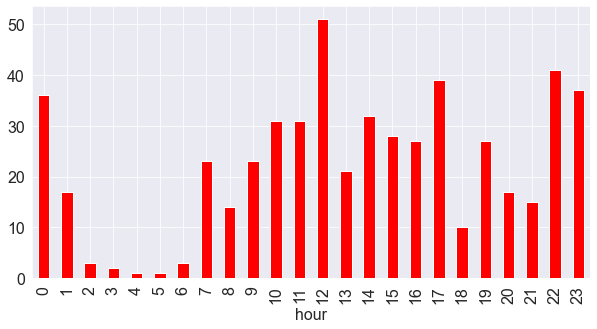

In [196]:
df['hour'] = df['date_time'].apply(lambda x: x.hour)
plt.figure(figsize=[10,5])
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar', color="red");
df[df['user']==me].groupby(['hour']).size().sort_index().sum()

## Q 4) 
## What is the difference in Weekend vs Weekday usage pattern?
## How many words do I type on average on weekday vs weekend?

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

In [76]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [77]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [78]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

+234 811 866 4056    2253
+234 903 914 4487    1651
+234 818 040 3761    1363
Pst Issac💻💻          1167
Dave💻💻                969
                     ... 
+234 706 716 2207       1
+234 701 870 8314       1
+234 905 171 9440       1
+234 813 019 4590       1
+234 803 454 4880       1
Name: user, Length: 139, dtype: int64

In [131]:
top20_users = msgs_per_user.index.tolist()[:20]
top20_users

['+234 811 866 4056',
 '+234 903 914 4487',
 '+234 818 040 3761',
 'Pst Issac💻💻',
 'Dave💻💻',
 '+234 818 175 7578',
 '+234 816 303 8128',
 '+234 814 707 7797',
 '+234 903 303 8619',
 '+234 806 866 7823',
 '+234 708 514 1617',
 '+234 906 978 0664',
 '+234 814 452 2376',
 'Jahdel💻💻',
 'Lekan👨🏾\u200d💻',
 '+234 902 574 7418',
 'Jome Fav Dlt',
 'Charles💻💻',
 'Mofe',
 '+234 909 712 2431']

In [141]:
df_top20 = df.copy()
df_top20 = df_top20[df_top20.user.isin(top20_users)]
df_top20.head()

# Sorting the messages only to me
df_mofe =df.copy()
df_mofe = df_mofe[(df_mofe["user"]== "Mofe") | (df_mofe["user"]== "EniG") | (df_mofe["user"]== "Mfonobong🐼🐼") | (df_mofe["user"]== "Charles💻💻") | (df_mofe["user"]== "Oloja🏫🏫")]
df_mofe.tail(10)

# df.head(10)

,date_time,user,msg,hour,weekday,is_weekend
27917,2021-05-13 12:10:00,Charles💻💻,😂😂😂😂😂u no delete am boss,12,Thursday,False
27919,2021-05-13 12:10:00,Charles💻💻,😂😂😂clown,12,Thursday,False
28002,2021-05-13 23:13:00,Charles💻💻,Like roommate like roommate 😂😂😂😂,23,Thursday,False
28003,2021-05-13 23:13:00,Charles💻💻,Shey u don delete dat ur babe pic,23,Thursday,False
28025,2021-05-14 07:36:00,Charles💻💻,Let us know na @2348163745386,7,Friday,False
28028,2021-05-14 07:47:00,Charles💻💻,They no wan answer us oooo,7,Friday,False
28035,2021-05-14 08:05:00,Charles💻💻,Better question shey class even dey,8,Friday,False
28038,2021-05-14 08:06:00,Charles💻💻,I dey come,8,Friday,False
28039,2021-05-14 08:07:00,Charles💻💻,😂😂😂get thee behind me,8,Friday,False
28040,2021-05-14 08:07:00,Charles💻💻,U wey dey class rn,8,Friday,False


C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128187 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127979 

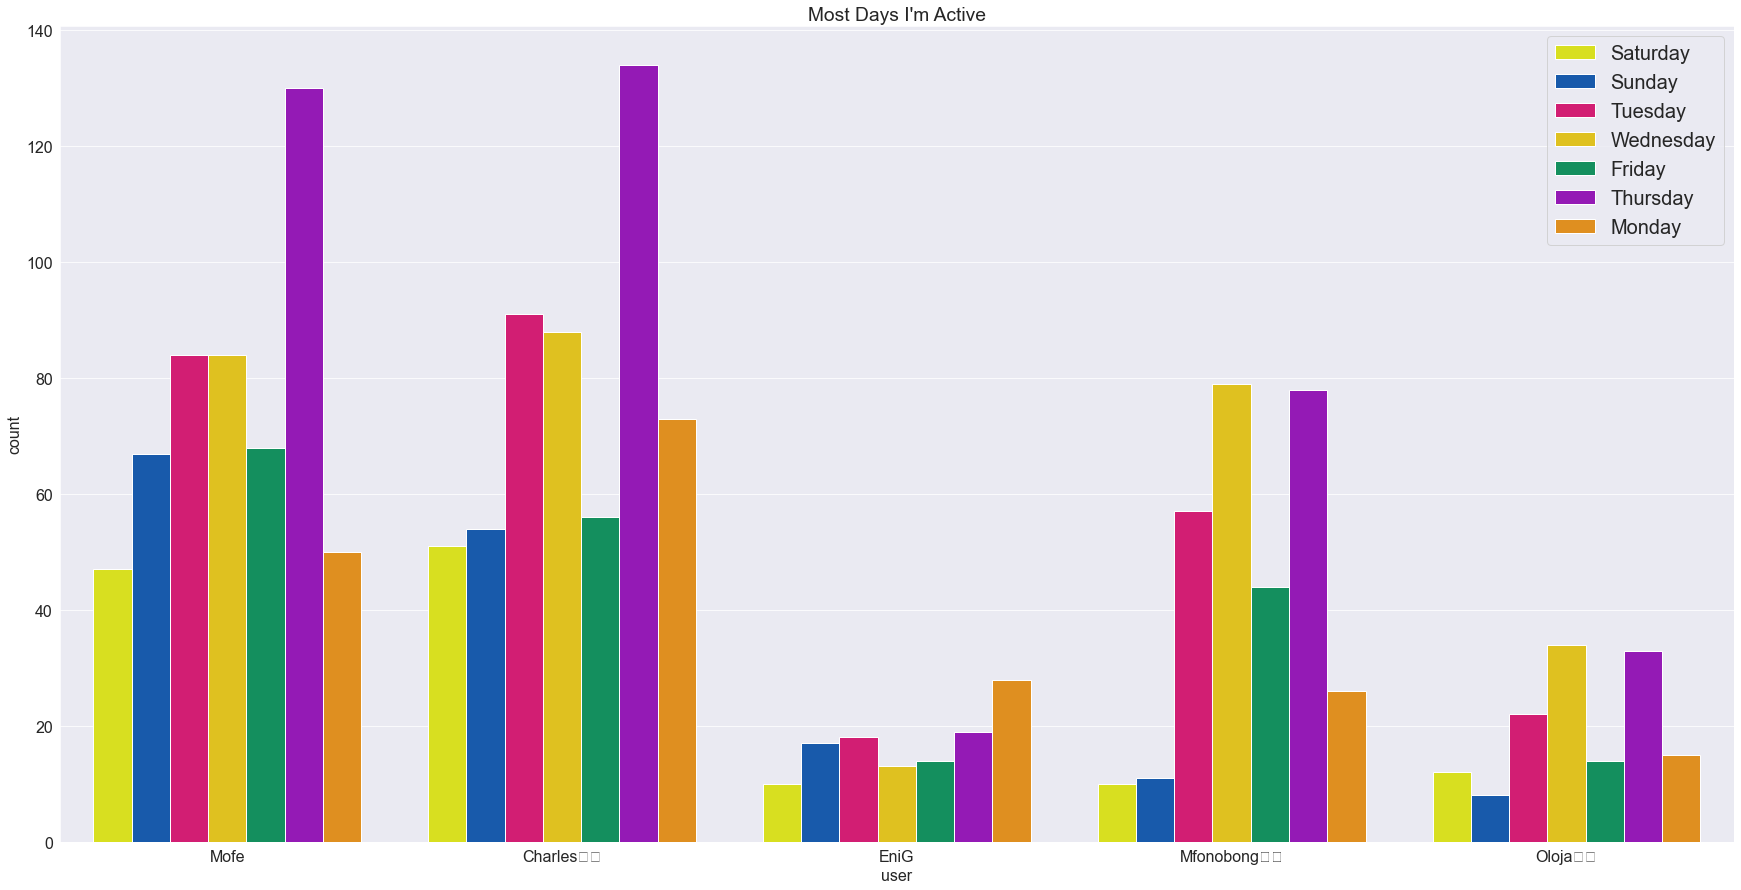

In [135]:
plt.figure(figsize=[30,15])

sns.countplot(x="user", hue="weekday", data=df_mofe, palette="prism");

plt.rcParams['font.size'] = "16"
plt.title("Most Days I'm Active")
plt.legend(prop={"size":20});

#### From the Inference above, I am active on Thursday the most

In [139]:
df_mofe['is_weekend'] = df_mofe.weekday.isin(['Sunday', 'Saturday'])

#### The plot below shows that I am the most active person in my friend group during the weekend

In [3]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_mofe)

NameError: name 'plt' is not defined

In [142]:
def word_count(val):
    return len(val.split())

In [143]:
df['no_of_words'] = df['msg'].apply(word_count)

In [144]:
df_mofe['no_of_words'] = df_mofe['msg'].apply(word_count)

In [150]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

123683

In [146]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

24078

In [147]:
total_words_weekday/5 # average words on a weekday

24736.6

In [151]:
total_words_weekend/2 # average words on a weekend

12039.0

In [153]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False).head(20)

user
+234 811 866 4056    8874
+234 818 175 7578    6928
+234 903 914 4487    6903
+234 818 040 3761    6598
Pst Issac💻💻          5806
+234 903 303 8619    5278
Dave💻💻               4881
Jahdel💻💻             4840
+234 806 866 7823    4776
+234 814 707 7797    4479
+234 708 514 1617    4136
Lekan👨🏾‍💻            3716
Mofe                 3606
+234 906 978 0664    3572
+234 813 056 8819    3373
Jome Fav Dlt         3367
+234 816 374 5386    3172
+234 816 303 8128    3005
+234 814 452 2376    2831
+234 902 574 7418    2673
Name: no_of_words, dtype: int64

In [156]:
# Number of Words divided by total messages sent
(df_mofe.groupby('user')['no_of_words'].sum()/df_mofe.groupby('user').size()).sort_values(ascending=False)

user
Mofe           6.803774
EniG           5.983193
Charles💻💻      4.594150
Oloja🏫🏫        3.623188
Mfonobong🐼🐼    2.760656
dtype: float64

In [175]:
wordPerMsg_weekday_vs_weekend = (df_mofe.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_mofe.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user         is_weekend
Charles💻💻    False         4.617647
             True          4.495238
EniG         False         6.565217
             True          4.000000
Mfonobong🐼🐼  False         2.841549
             True          1.666667
Mofe         False         6.899038
             True          6.456140
Oloja🏫🏫      False         3.813559
             True          2.500000
dtype: float64

<AxesSubplot:ylabel='user,is_weekend'>

C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128187 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127979 

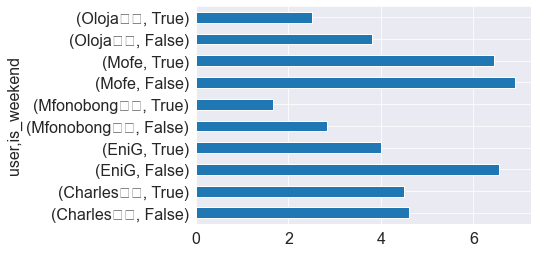

In [176]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

## Q 5)
## Most Usage - Time of Day

In [183]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,105.0,37.0,50.0,127.0,64.0,65.0,181.0
1,31.0,70.0,23.0,85.0,47.0,62.0,22.0
2,14.0,13.0,13.0,7.0,23.0,18.0,32.0
3,9.0,25.0,9.0,NaN,7.0,5.0,18.0
4,3.0,19.0,5.0,3.0,5.0,3.0,3.0


#### From the plot below, I can see most texts are between 8am and 3pm, which makes sense cause most of our classes are within that time range. Also the least time we are active is betweem 1am and 5am

Also less texts are on the Weekends since there isn't classes

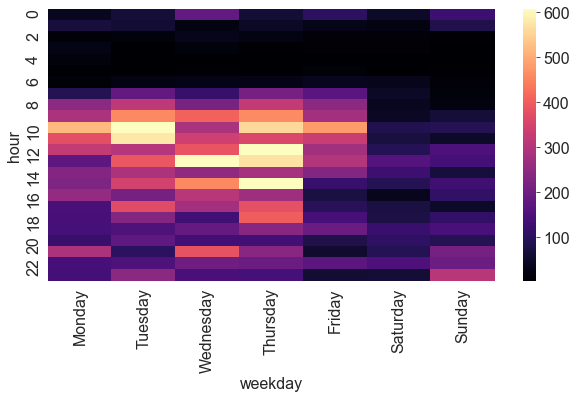

In [182]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=[10,5])
sns.heatmap(x2[days].fillna(0), robust=True, cmap="magma");

## Q 6)
## In any group, do I have any inclination towards responding to someone? 

In [184]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[    8     9    11    25    81    82   100   101   106   112   162   184
   189   250   251   304   309   316   429   432  1122  1144  1145  1164
  1271  1272  1475  1478  1717  1736  1740  1746  1748  1750  1753  1754
  1759  1832  1934  1946  1981  1983  2131  2132  2189  2242  2244  2246
  2277  2454  2471  2495  2536  2567  2569  2571  3210  3212  3217  3218
  3219  3225  3467  3468  3470  3471  3550  3554  3557  3558  3579  3756
  3757  3827  3829  3906  3917  4068  4098  4469  4546  4709  4751  4882
  4883  4972  4980  5174  5175  5176  5177  5178  5179  5180  5243  5249
  5263  5271  5273  5286  5297  5300  5301  5343  5345  5366  5442  5469
  5471  5474  5481  5526  5530  5751  5877  5881  5882  5895  5919  5941
  5970  6059  6085  6087  6092  6114  6115  6145  6147  6216  6218  6220
  6225  6226  6234  6248  6249  6254  6256  6262  6309  6310  6313  6314
  6355  6361  6362  6363  6393  6397  6410  6445  6473  6503  6525  6542
  6549  6743  6806  6822  7020  7551  7954  8085  8

In [199]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[    7     8    10    24    80    81    99   100   105   111   161   183
   188   249   250   303   308   315   428   431  1121  1143  1144  1163
  1270  1271  1474  1477  1716  1735  1739  1745  1747  1749  1752  1753
  1758  1831  1933  1945  1980  1982  2130  2131  2188  2241  2243  2245
  2276  2453  2470  2494  2535  2566  2568  2570  3209  3211  3216  3217
  3218  3224  3466  3467  3469  3470  3549  3553  3556  3557  3578  3755
  3756  3826  3828  3905  3916  4067  4097  4468  4545  4708  4750  4881
  4882  4971  4979  5173  5174  5175  5176  5177  5178  5179  5242  5248
  5262  5270  5272  5285  5296  5299  5300  5342  5344  5365  5441  5468
  5470  5473  5480  5525  5529  5750  5876  5880  5881  5894  5918  5940
  5969  6058  6084  6086  6091  6113  6114  6144  6146  6215  6217  6219
  6224  6225  6233  6247  6248  6253  6255  6261  6308  6309  6312  6313
  6354  6360  6361  6362  6392  6396  6409  6444  6472  6502  6524  6541
  6548  6742  6805  6821  7019  7550  7953  8084  8

In [201]:
df_replies = df.iloc[prev_msgs_index].copy()

C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ABRAHAM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128

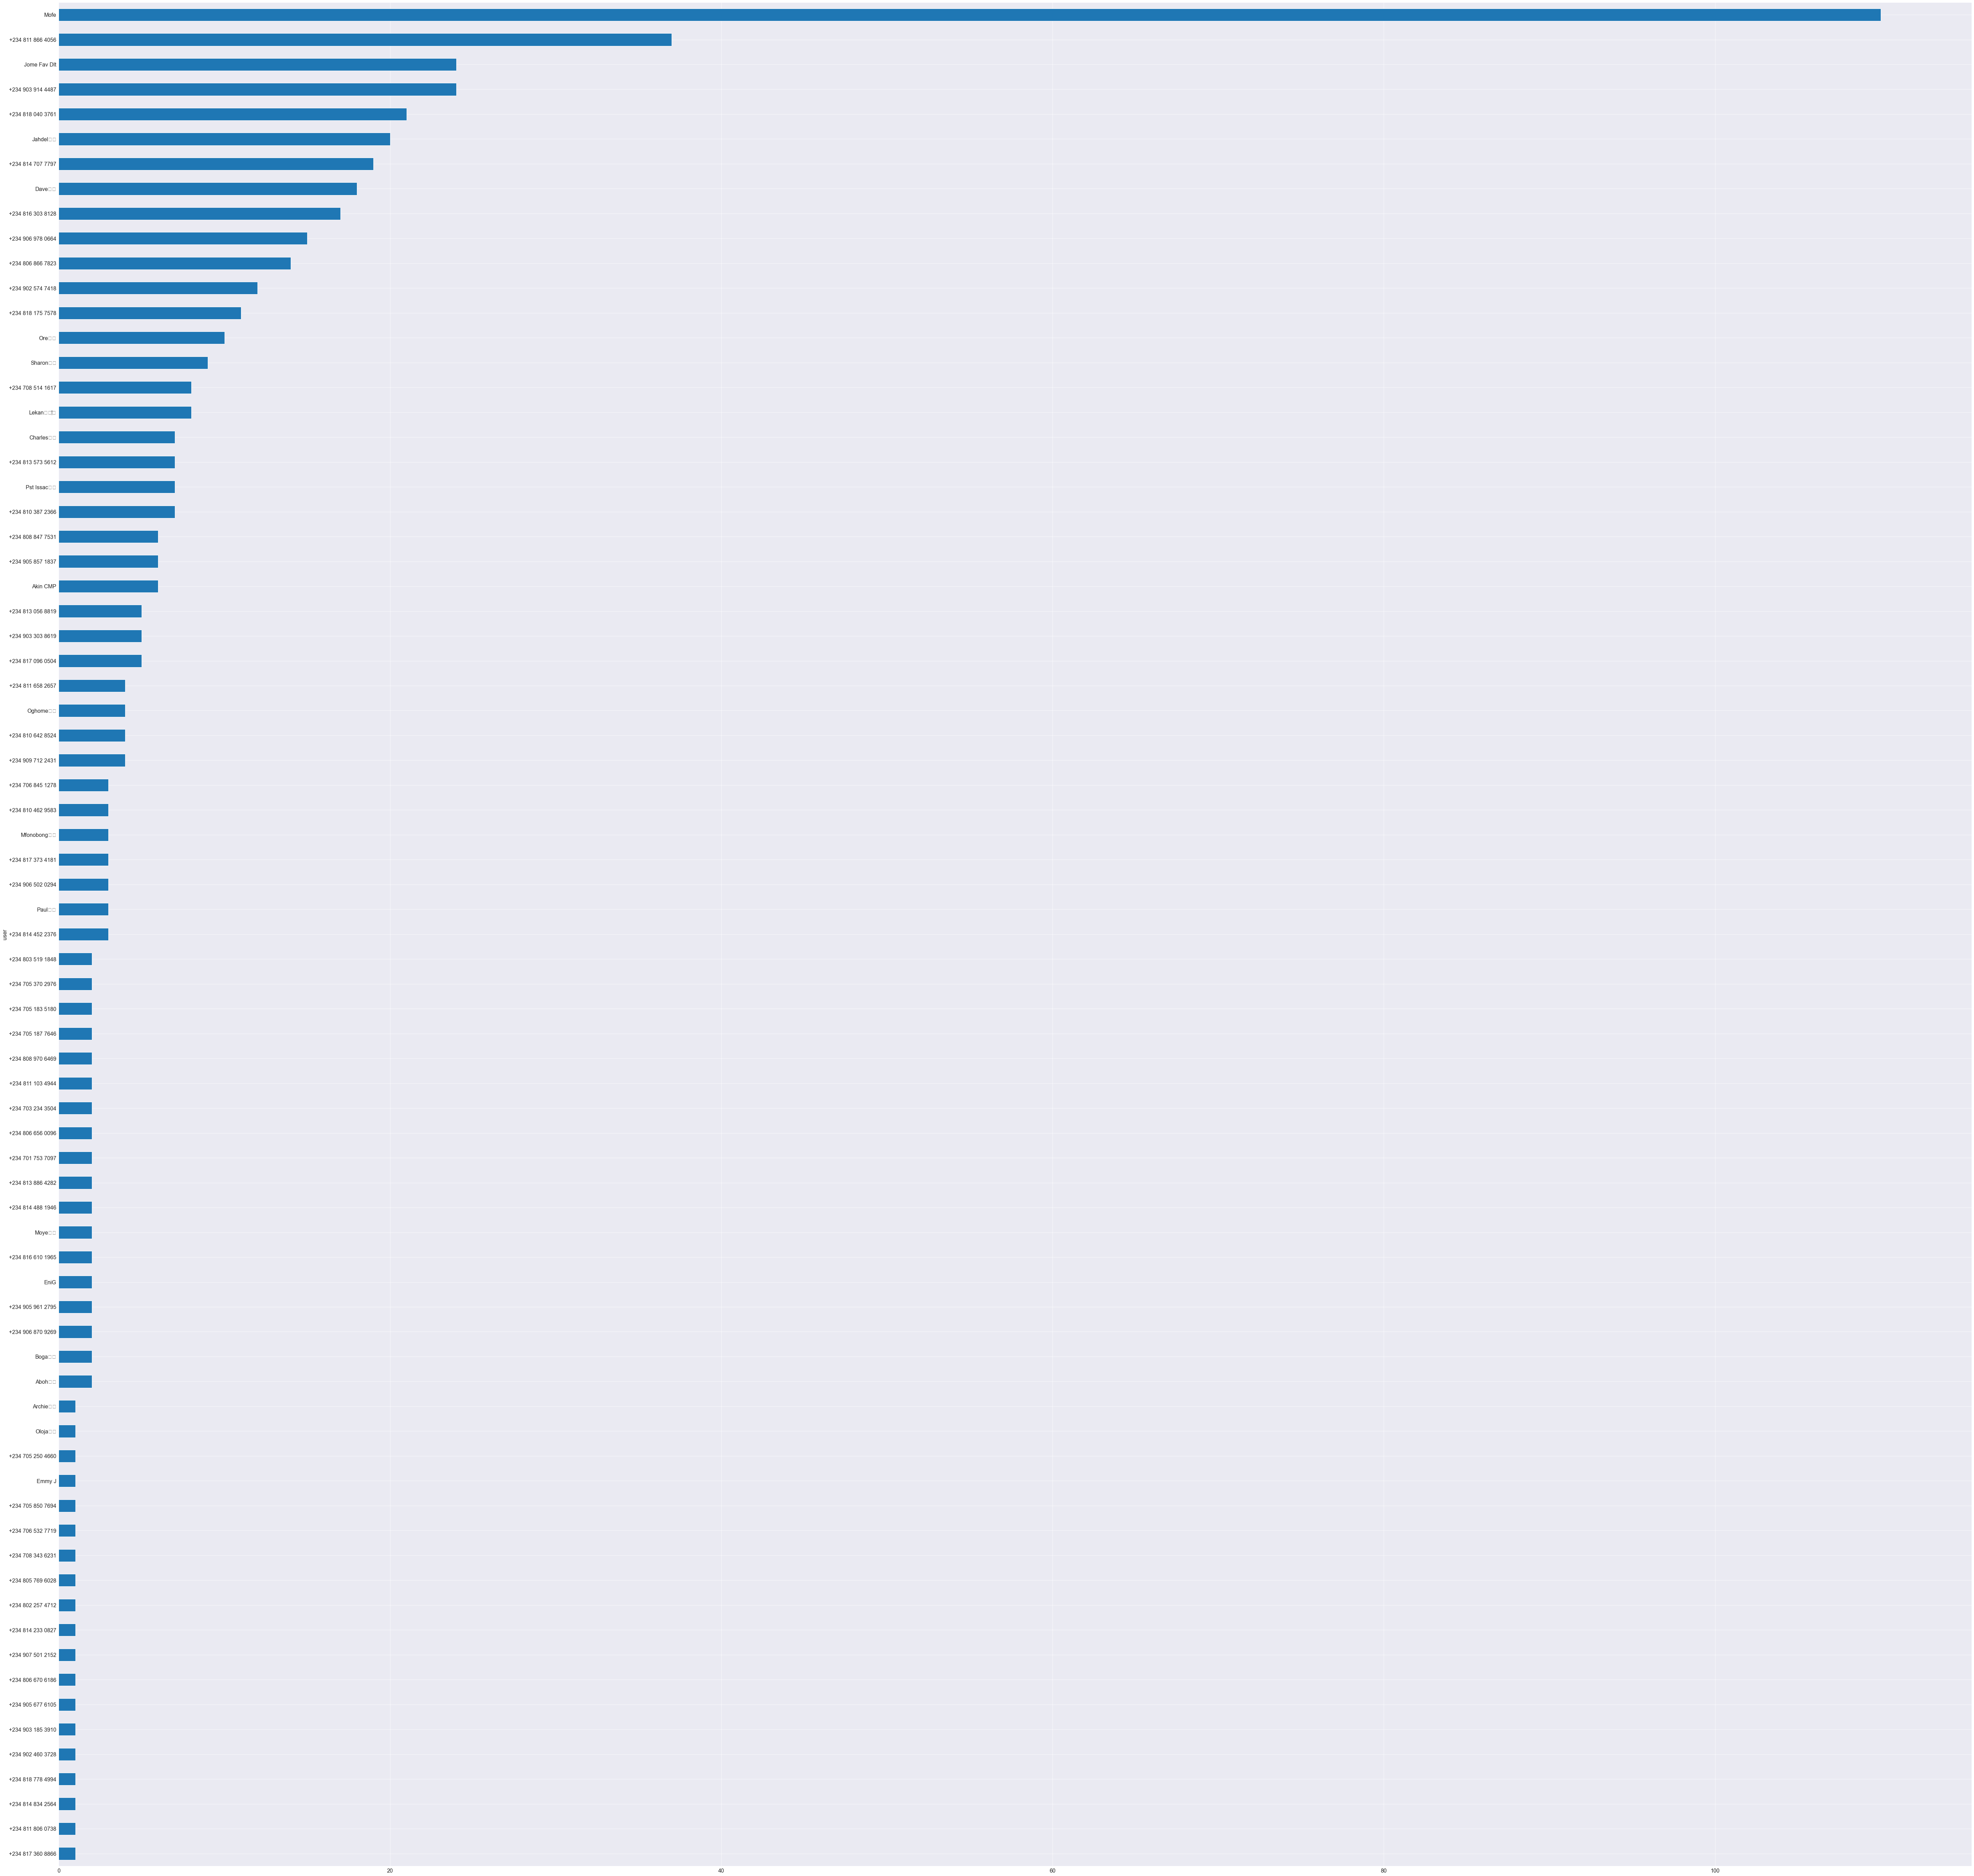

In [193]:
plt.figure(figsize=[100,100])
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh');

## Q 7)
## Which are the most common words?

In [194]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


From the wordcloud, we see "Abeg" is the most used word. It is a Nigerian slang for please. While "Dey" means a lot of things like "I dey" means "I a fine" or "The man dey" means "The lecturer is around"

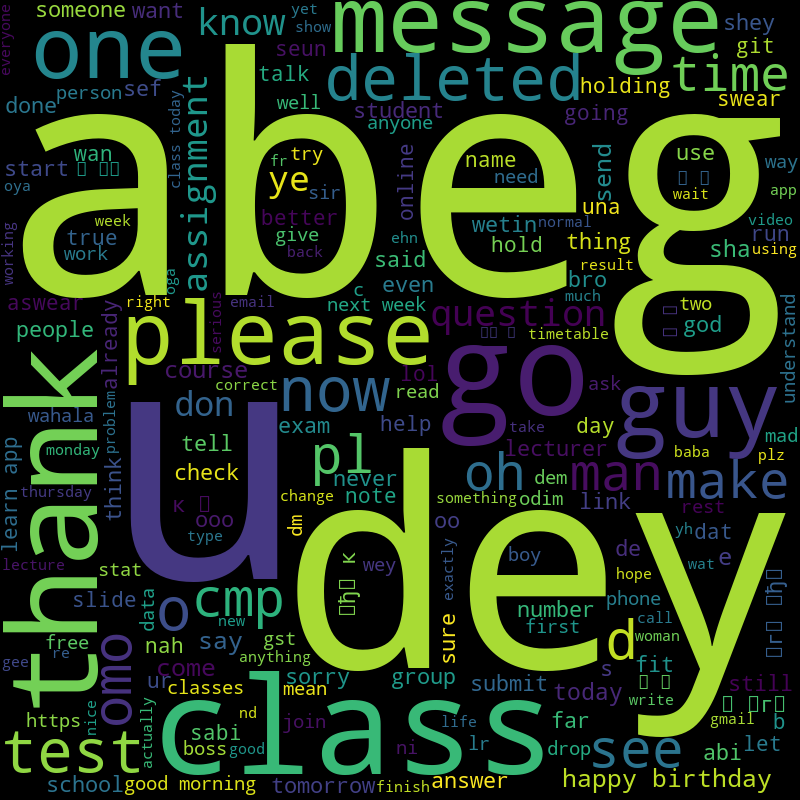

In [202]:
wordcloud.to_image()

## Know What They Know(atleast by little
* Let this meetup series encourage people to work on their own data:
    * Ask many questions on whatsapp chat data, commit to jovian with your answers/analysis visulization. Experiment!!!
* Explore more data resources here's a list i could find, share if you find any @ dsnet.org
    * WhatsApp
    * Google take out (https://takeout.google.com/)
        * Keyboard
        * Maps
        * Calendar 
        * Chrome
        * Pay
        * etc....
    * https://www.cnet.com/how-to/how-to-download-all-your-instagram-data/
    * https://in.pcmag.com/software/120204/how-to-download-your-facebook-data-and-6-surprising-things-i-found
* Lets move step by step EDA first to try answer the questions on our own then move to some ML/DL Models 

## Assignment-kind
* 1way ya 2way, check for a response time between two people

In [5]:
jovian.commit()

[jovian] Saving notebook..


<IPython.core.display.Javascript object>

[jovian] Updating notebook "1dbae75b1bc24bd7903e5e3f1ac24048" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis
